REG NO MAY22/MCOMP/1616U

a)	Import the necessary python libraries (2 marks)

In [2]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np

b)	Remove the Website and put the table in Notebook (4 marks)

In [3]:
url = 'https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease'
whole_page = requests.get(url)
doc = lh.fromstring(whole_page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:6]]

tr_elements = doc.xpath('//tr')

cols = []
i = 0

for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    cols.append((name,[]))

1:Year
2:Country
3:EVD
4:Cases
5:Deaths
6:Case fatality 


In [4]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row

    if len(T)!=6: #if row is not size 3, //tr data is not from the table.
        break

    i = 0 #i is the index of the first column

    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()

        cols[i][1].append(data) #append the data to the empty list of the i'th column

        i+=1


[len(C) for (title,C) in cols]
Dict = {title:column for (title,column) in cols}
df = pd.DataFrame(Dict)
df.describe()

,Year,Country,EVD,Cases,Deaths,Case fatality
count,41,41,41,41,41,41
unique,28,20,7,33,31,27
top,2014,Democratic Republic of the Congo,Zaire,1,0,0%
freq,6,9,25,8,5,5


a.	First 10 records (2 marks)

In [5]:
df.head(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%
5,2017,Democratic Republic of the Congo,Zaire,8,4,50%
6,2015,Italy,Zaire,1,0,0%
7,2014,Spain,Zaire,1,0,0%
8,2014,UK,Zaire,1,0,0%
9,2014,USA,Zaire,4,1,25%


b.	Last 10 records (2 marks)

In [6]:
df.tail(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
31,1996,South Africa (ex-Gabon),Zaire,1,1,100%
32,1996 (Jul-Dec),Gabon,Zaire,60,45,75%
33,1996 (Jan-Apr),Gabon,Zaire,31,21,68%
34,1995,Democratic Republic of the Congo,Zaire,315,254,81%
35,1994,Côte d'Ivoire,Taï Forest,1,0,0%
36,1994,Gabon,Zaire,52,31,60%
37,1979,Sudan,Sudan,34,22,65%
38,1977,Democratic Republic of the Congo,Zaire,1,1,100%
39,1976,Sudan,Sudan,284,151,53%
40,1976,Democratic Republic of the Congo,Zaire,318,280,88%


d)	Clean the data set (8 marks)

In [7]:
# clean dataset
df = df.drop([0,1,3,13,14,15,16,28,29])
df['Cases'] = df['Cases'].str.strip()
df['Deaths'] = df['Deaths'].str.strip()
df.iloc[:,5] =df.iloc[:,5].str.strip()
df['Year'] = df['Year'].str.strip()
df['Year'] = df['Year'].str.replace(r"\(.*\)","")
df.iloc[:,5] =df.iloc[:,5].str.replace(r"%","")

df1 =df

df['Year'] = pd.to_numeric(df['Year'])
df['Cases'] = pd.to_numeric(df['Cases'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df.iloc[:,5] =pd.to_numeric(df.iloc[:,5])
df

/var/folders/hs/n89pb8xs1hn99hclj9gwq50m0000gn/T/ipykernel_78004/3154577817.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'] = df['Year'].str.replace(r"\(.*\)","")


,Year,Country,EVD,Cases,Deaths,Case fatality
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
4,2018,Democratic Republic of the Congo,Zaire,54,33,61
5,2017,Democratic Republic of the Congo,Zaire,8,4,50
6,2015,Italy,Zaire,1,0,0
7,2014,Spain,Zaire,1,0,0
8,2014,UK,Zaire,1,0,0
9,2014,USA,Zaire,4,1,25
10,2014,Senegal,Zaire,1,0,0
11,2014,Mali,Zaire,8,6,75
12,2014,Nigeria,Zaire,20,8,40


e)	Produce the descriptive statistical table values. (2 marks)

In [8]:
df.dtypes

Year               int64
Country           object
EVD               object
Cases              int64
Deaths             int64
Case fatality      int64
dtype: object

In [9]:

df.describe()

,Year,Cases,Deaths,Case fatality
count,32.000000,32.000000,32.000000,32.000000
mean,2003.656250,77.843750,50.000000,54.750000
std,12.734534,115.760071,80.139395,31.088843
min,1976.000000,1.000000,0.000000,0.000000
25%,1996.000000,3.250000,1.000000,40.750000
50%,2007.000000,27.500000,15.500000,58.500000
75%,2014.000000,77.500000,39.000000,76.500000
max,2020.000000,425.000000,280.000000,100.000000


f)	Check the correlations between the features (2 marks)

In [10]:
df.corr()

,Year,Cases,Deaths,Case fatality
Year,1.000000,-0.382171,-0.429596,-0.413409
Cases,-0.382171,1.000000,0.954326,0.214592
Deaths,-0.429596,0.954326,1.000000,0.310431
Case fatality,-0.413409,0.214592,0.310431,1.000000


g)	Generate the regression plots between variables.  (2 marks)

In [11]:
import seaborn as sns

In [12]:
# getting numeric columns to use
year = df.Year
cases = df.Cases
deaths = df.Deaths
cases_fatality = df.iloc[:,5]

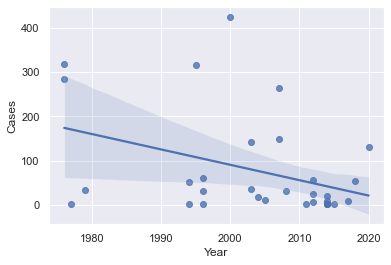

In [13]:
sns.set_theme(color_codes=True)

sns.regplot(x=year, y=cases);


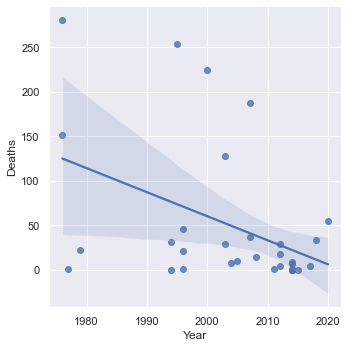

In [14]:
sns.lmplot(x="Year", y="Deaths",data=df)

h)	Generate a heatmap for the correlations of features. (4 marks)

<AxesSubplot:>

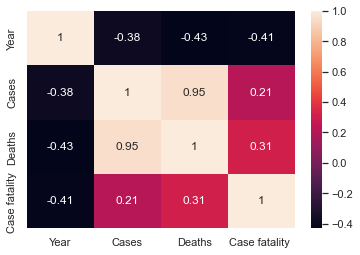

In [15]:
sns.heatmap(df.corr(),annot=True)

i)	Produce Simple Linear Regression model to show relationship between the two features that are strongly correlated. (4 marks)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= pd.DataFrame(df['Cases'])
y =pd.DataFrame(df['Deaths'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9589036783600119


/Users/dbaluku/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['_ElementUnicodeResult']. An error will be raised in 1.2.
  warnings.warn(
/Users/dbaluku/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['_ElementUnicodeResult']. An error will be raised in 1.2.
  warnings.warn(


Compute the slope and the intercept of your graph and deduce your model in the form
y=mx+c  (4 marks)


In [17]:

y_pred = regr.predict(X_test)


/Users/dbaluku/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['_ElementUnicodeResult']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
# Slope
print(regr.coef_)

[[0.66143342]]


In [19]:
# intercept
print (regr.intercept_)

[-1.57830929]


k)	Evaluate your model and make a conclusion based on R-square and Mean Square Error values. (4 marks)

In [20]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1.7921122505388176
Mean Squared Error: 4.521006343615094
Root Mean Square Error: 2.1262658214849557


Section B

 Question Four

a) Import necessary libraries for Support Vector Machine (SVM) algorithm. (5 marks)

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import pandas as pd


b)	Produce the SVM model. (5 marks)

In [22]:
feature_df= df[['Cases','Year']]
X = np.asarray(feature_df)
y = pd.DataFrame(df['Deaths']).astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3)
X_train

array([[ 318, 1976],
       [   1, 1994],
       [ 315, 1995],
       [  34, 1979],
       [   1, 2015],
       [   8, 2017],
       [  60, 1996],
       [  31, 1996],
       [  12, 2005],
       [  57, 2012],
       [ 284, 1976],
       [ 264, 2007],
       [   7, 2012],
       [ 149, 2007],
       [  24, 2012],
       [  32, 2008],
       [   1, 2014],
       [   4, 2014],
       [ 130, 2020],
       [   8, 2014],
       [   1, 2011],
       [  52, 1994]])

In [23]:

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

/Users/dbaluku/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

c)	Calculate accuracy of the model and F1 for Support Vector Machine. (5 marks)

In [24]:
# Model Accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import f1_score
print("F1 score",  f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.2
F1 score 0.06666666666666668


d)	Product the Jaccard index score value. (5 marks)

In [25]:
from sklearn.metrics import jaccard_score
print("Jacard score ",jaccard_score(y_test, y_pred, average='weighted'))

Jacard score  0.04


Question Five

    a)	Import necessary libraries for Logistic Regression algorithm. (5 marks)

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

b)	Produce the Logistic Regression model. (5 marks)

In [27]:
X = np.asarray(df[['Year','Cases']])
y =pd.DataFrame(df['Deaths'])

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[ 1.30395561,  0.45776408],
       [ 1.14438934, -0.20927142],
       [ 1.06460621, -0.61300343],
       [ 0.90503994, -0.67444091],
       [ 0.8252568 , -0.67444091]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (25, 2) (25, 1)
Test set: (7, 2) (7, 1)


In [29]:
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR.classes_
LR.intercept_
LR.coef_

/Users/dbaluku/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.63506762e-02, -2.16290819e-02],
       [ 3.74191955e-03, -1.59208407e-02],
       [ 3.44332208e-02, -1.40065141e-02],
       [ 2.60189596e-02, -8.39960659e-03],
       [ 1.85607361e-02, -7.86553464e-03],
       [ 2.60461682e-02, -7.41259974e-03],
       [ 1.92972391e-02, -8.25615219e-03],
       [ 2.15861716e-02, -6.54931781e-03],
       [ 2.45594847e-02, -7.12482894e-03],
       [ 1.26098683e-02, -6.87912974e-03],
       [-9.57708394e-05, -6.98337746e-03],
       [ 1.78537397e-02, -6.40570946e-03],
       [ 1.11619273e-02, -5.19327165e-03],
       [ 2.91148181e-02, -4.53365243e-03],
       [ 2.11043129e-02,  3.05267996e-03],
       [ 1.26757154e-02, -4.49403326e-03],
       [ 1.80993922e-02,  2.47660141e-03],
       [-1.77045949e-03,  1.35137800e-02],
       [ 1.64970456e-02,  2.56051207e-02],
       [ 1.25078248e-02,  1.64560903e-02],
       [-1.69306318e-03,  1.63096644e-02]])

In [30]:
y_pred = LR.predict(X_test)
y_pred

array([  0,   1, 224,   0,   0,   0,   4])

In [31]:
ypred_prob = LR.predict_proba(X_test)
ypred_prob


array([[0.04829603, 0.04765383, 0.04816219, 0.04775968, 0.04763159,
        0.04775559, 0.0476458 , 0.04767649, 0.04772922, 0.04752683,
        0.04731338, 0.04761296, 0.04749468, 0.04779403, 0.04762415,
        0.04751695, 0.04757619, 0.04719083, 0.04744267, 0.04741764,
        0.04717926],
       [0.04822485, 0.04823285, 0.04773546, 0.04753038, 0.04763415,
        0.04751318, 0.04762965, 0.04756596, 0.04753077, 0.04770741,
        0.04790151, 0.04762   , 0.04770062, 0.04741777, 0.04740986,
        0.04766581, 0.04746511, 0.04757783, 0.04709593, 0.04731182,
        0.04752907],
       [0.04733426, 0.04717524, 0.04746613, 0.04740126, 0.04737143,
        0.04744182, 0.04736056, 0.04744623, 0.04744329, 0.04737054,
        0.04727824, 0.04742624, 0.04742946, 0.04758086, 0.0478358 ,
        0.04746855, 0.04779138, 0.04810542, 0.04872771, 0.04832507,
        0.04822048],
       [0.04858546, 0.04774016, 0.04840679, 0.04788646, 0.04770772,
        0.04787047, 0.04773105, 0.04775443, 0.0478317

c)	Calculate accuracy of the model and F1 for Logistic Regression. (5 marks)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import f1_score
print ("FI score", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.42857142857142855
FI score 0.19047619047619047


d)	Product the Jaccard index score and Log loss values. (5 marks)

In [33]:
print("Jacard score ", jaccard_score(y_test, y_pred, average='weighted'))

Jacard score  0.2857142857142857


Question Three

a)	Import necessary libraries for Decision Trees algorithm. (4 marks)

In [34]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

b)	Build an empty Decision Tree object with depth 5. (4 marks)

In [35]:
TelecomTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
TelecomTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

c)	Train the decision tree using the global X data set. (4 marks)

In [41]:
X = np.asarray(df1[['Year','Cases']])
y =pd.DataFrame(df1['Deaths'])

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.30395561,  0.45776408],
       [ 1.14438934, -0.20927142],
       [ 1.06460621, -0.61300343],
       [ 0.90503994, -0.67444091],
       [ 0.8252568 , -0.67444091]])

In [42]:
TelecomTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [43]:
predTree = TelecomTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[ 29   1 187   0   1]
    Deaths
17      29
31       1
23     187
6        0
9        1


d)	Print the Decision Tree to appear similar to the figure below. (4 marks)

In [44]:
dot_data = StringIO()
filename = "ebolatree.png"
featureNames = ['Cases', 'Years']
targetNames = df["Deaths"].unique().tolist()
featureNames

['Cases', 'Years']

In [45]:
out=tree.export_graphviz(TelecomTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_train), filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: can only concatenate str (not "numpy.int64") to str